In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


In [2]:
diabet_dataset = pd.read_csv('diabetes.csv')
diabet_dataset.head()

,Kehamilan,Glukosa,TekananDarah,KetebalanKulit,Insulin,BeratBadan,RiwayatDiabetes,Umur,HasilPrediksi
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabet_dataset.shape

(768, 9)

In [4]:
diabet_dataset['HasilPrediksi'].value_counts()

0    500
1    268
Name: HasilPrediksi, dtype: int64

In [5]:
diabet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kehamilan        768 non-null    int64  
 1   Glukosa          768 non-null    int64  
 2   TekananDarah     768 non-null    int64  
 3   KetebalanKulit   768 non-null    int64  
 4   Insulin          768 non-null    int64  
 5   BeratBadan       768 non-null    float64
 6   RiwayatDiabetes  768 non-null    float64
 7   Umur             768 non-null    int64  
 8   HasilPrediksi    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabet_dataset.describe()

,Kehamilan,Glukosa,TekananDarah,KetebalanKulit,Insulin,BeratBadan,RiwayatDiabetes,Umur,HasilPrediksi
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='HasilPrediksi'>

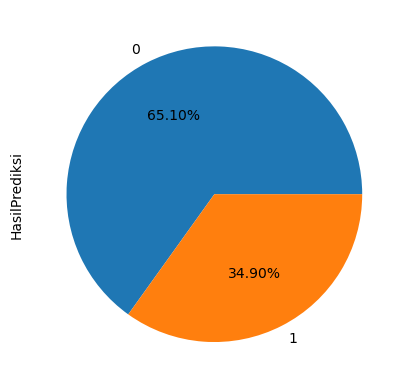

In [7]:
diabet_dataset['HasilPrediksi'].value_counts().plot.pie(autopct='%1.2f%%')

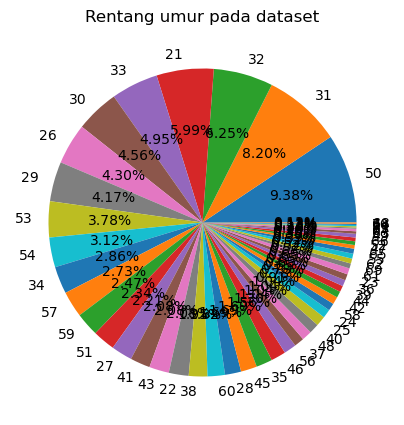

In [8]:
age=diabet_dataset['Umur'].value_counts()
ages_index=diabet_dataset['Umur'].unique()
len(ages_index)

plt.figure(figsize=(12, 5))
plt.pie(x=age, labels=ages_index, autopct='%1.2f%%')
plt.title('Rentang umur pada dataset')
plt.show()


<Axes: >

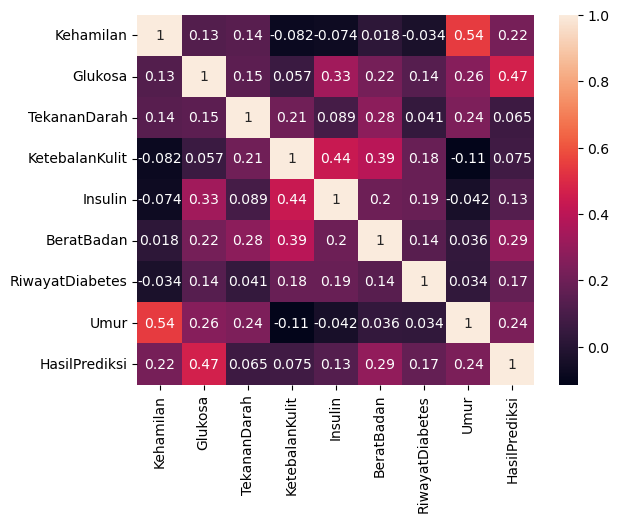

In [9]:
sns.heatmap(diabet_dataset.corr(),annot=True)

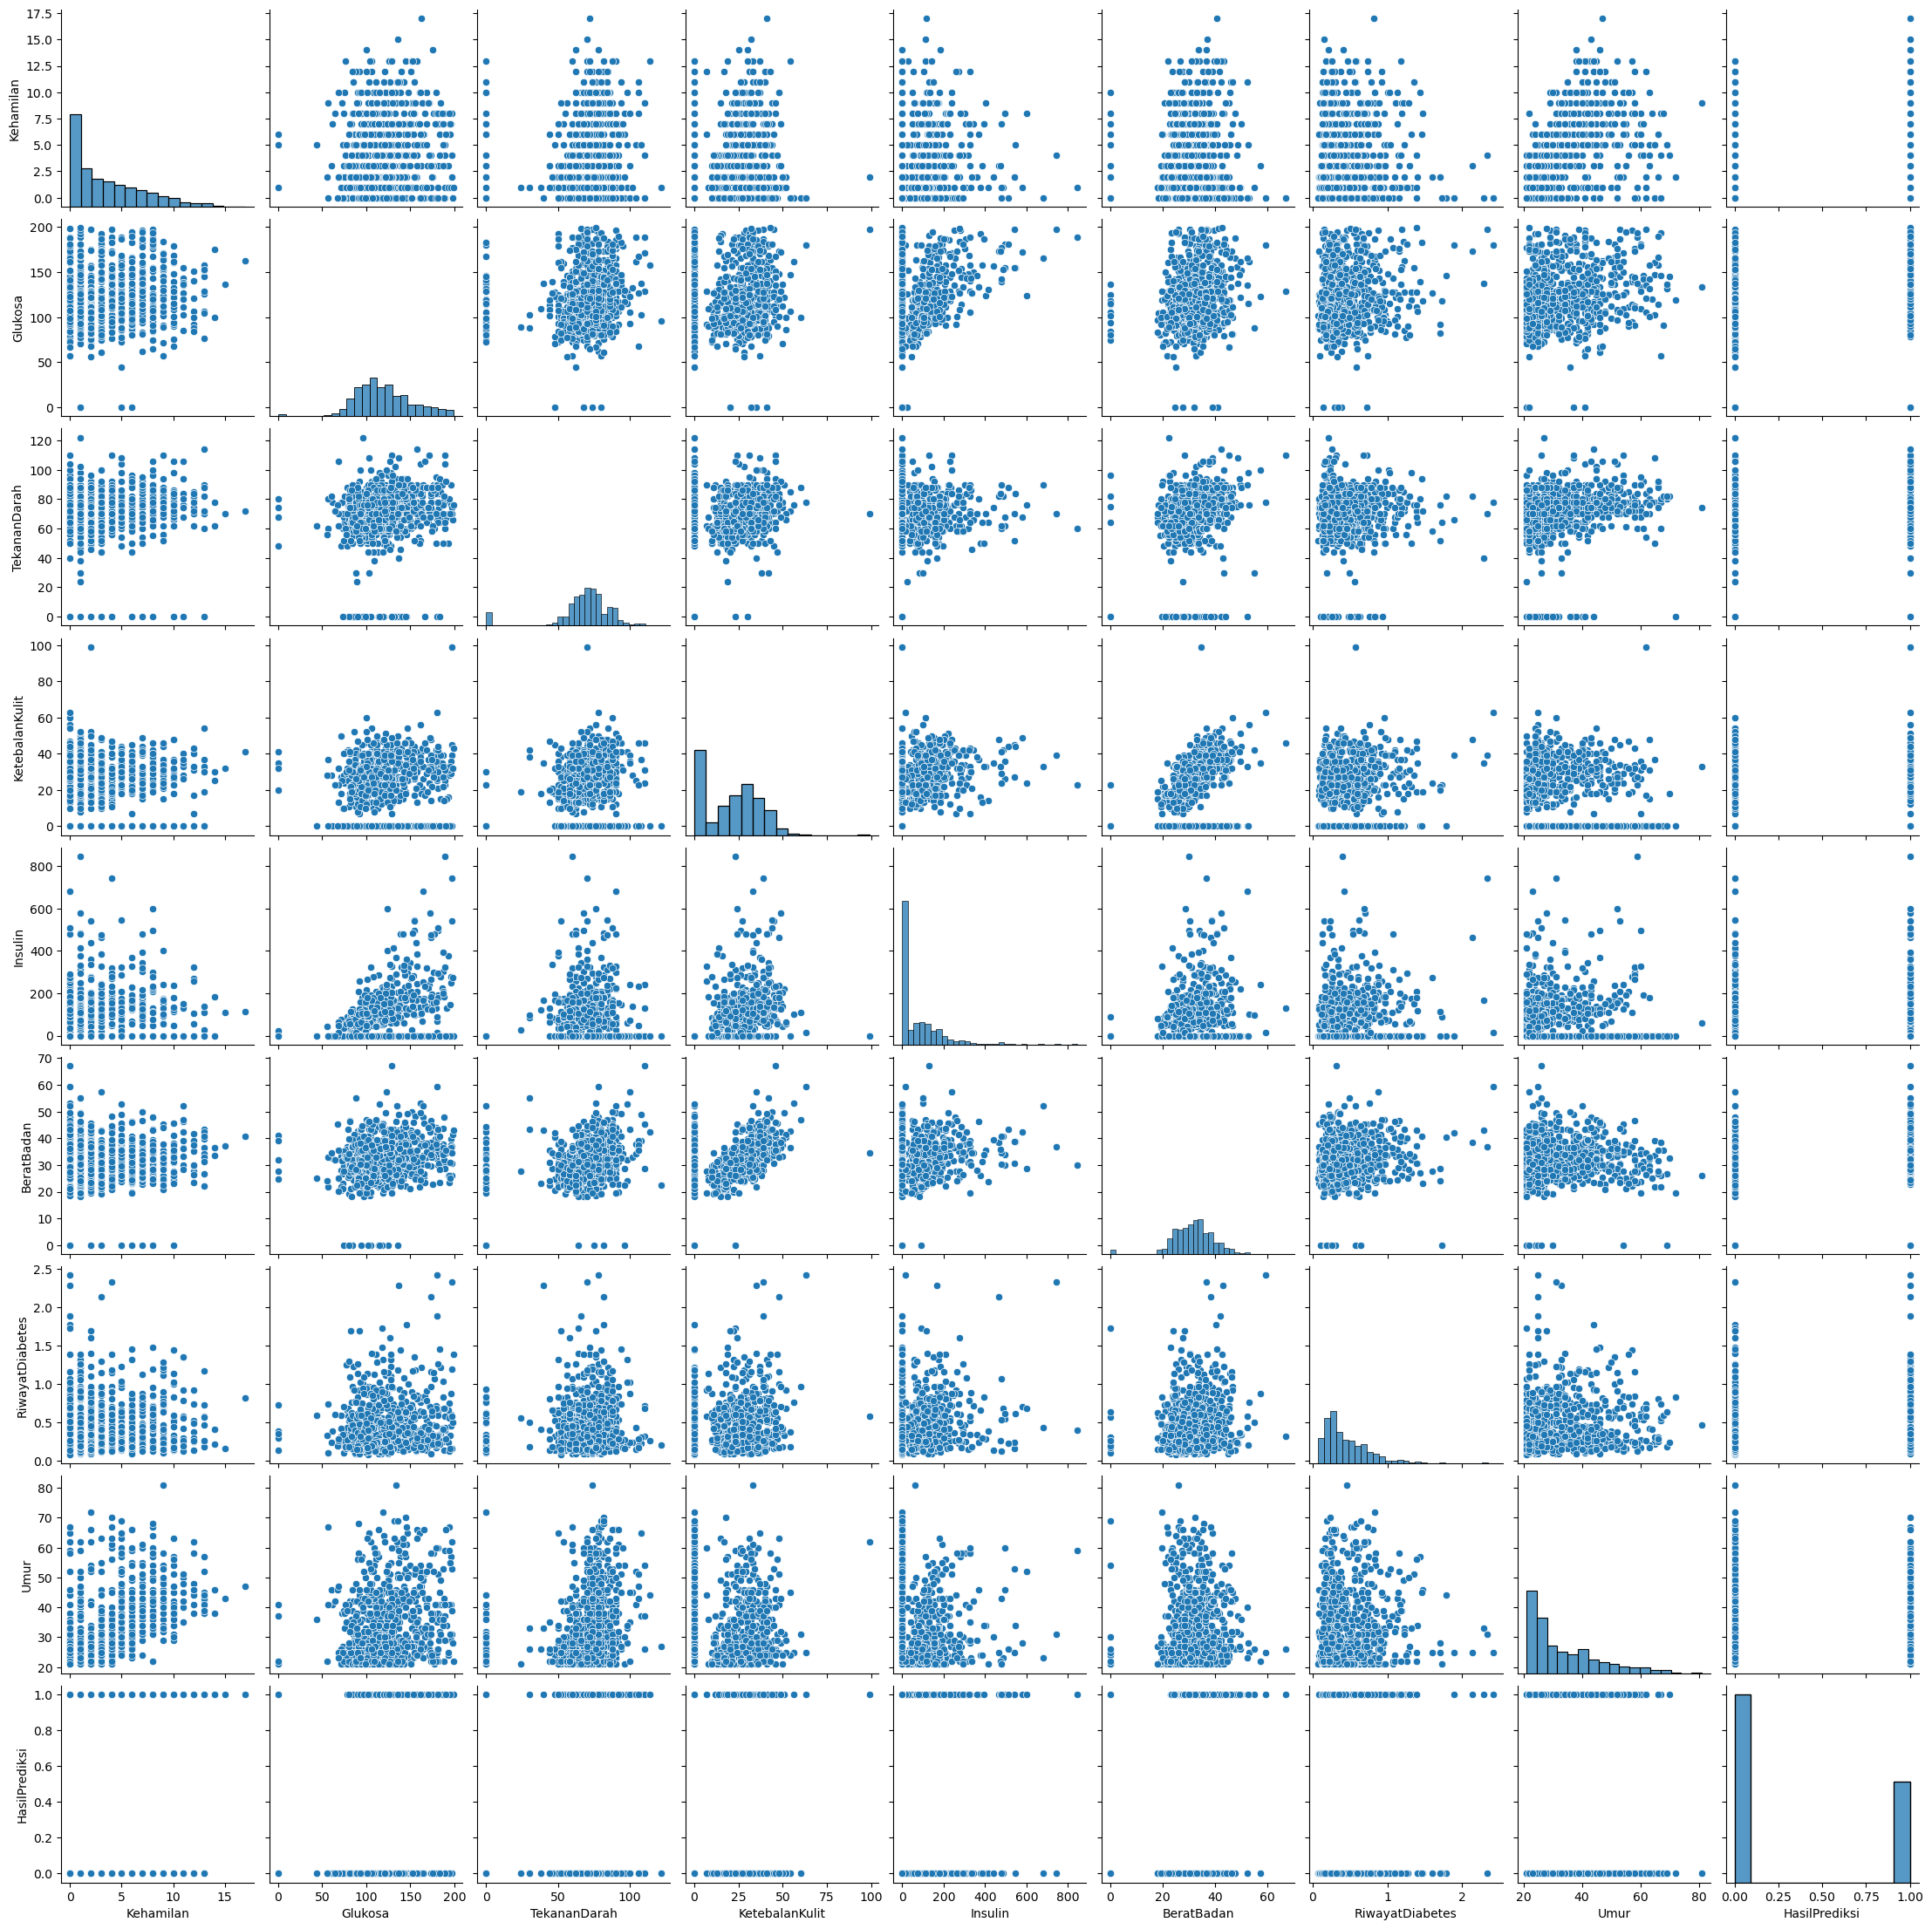

In [10]:
sns.pairplot(diabet_dataset)

In [11]:
X = diabet_dataset.drop(columns='HasilPrediksi', axis=1)
Y = diabet_dataset['HasilPrediksi']

In [12]:
print(X)

     Kehamilan  Glukosa  TekananDarah  KetebalanKulit  Insulin  BeratBadan  \
0            6      148            72              35        0        33.6   
1            1       85            66              29        0        26.6   
2            8      183            64               0        0        23.3   
3            1       89            66              23       94        28.1   
4            0      137            40              35      168        43.1   
..         ...      ...           ...             ...      ...         ...   
763         10      101            76              48      180        32.9   
764          2      122            70              27        0        36.8   
765          5      121            72              23      112        26.2   
766          1      126            60               0        0        30.1   
767          1       93            70              31        0        30.4   

     RiwayatDiabetes  Umur  
0              0.627    50  
1    

In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: HasilPrediksi, Length: 768, dtype: int64


In [14]:
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [15]:
standarized_data = scaler.transform(X)
print(standarized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
X = standarized_data
Y = diabet_dataset['HasilPrediksi']

In [17]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: HasilPrediksi, Length: 768, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [20]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [21]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Akurasi data training', training_data_accuracy)


Akurasi data training 0.7866449511400652


In [22]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Akurasi data testing', test_data_accuracy)


Akurasi data testing 0.7727272727272727


In [23]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, Y_train)


LogisticRegression()

In [24]:
print(log.score(X_train,Y_train))  

0.7850162866449512


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)


array([[83, 17],
       [28, 26]], dtype=int64)

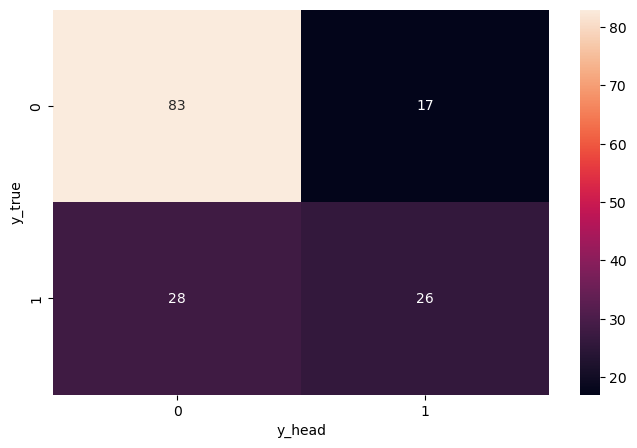

In [27]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()


In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.60      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



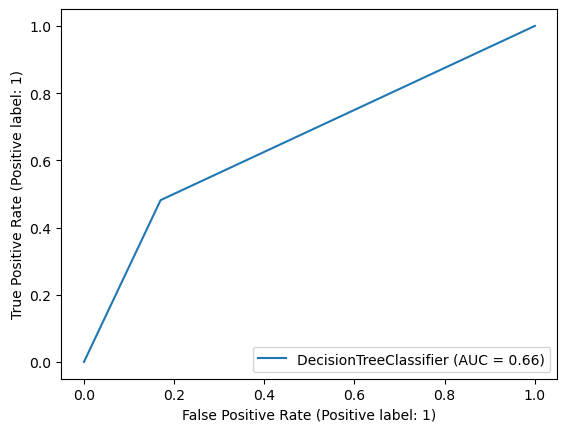

In [29]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, Y_test)


In [33]:
input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Pasien tidak terkena diabetes')
else :
  print('Pasien terkena diabetes')

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]
Pasien tidak terkena diabetes


c:\Ana\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import pickle

In [32]:
#filename = 'diabet_model.sav'
#pickle.dump(classifier, open(filename, 'wb'))